In [ ]:
## import sklearn
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import nltk
from sklearn.linear_model import SGDClassifier
from konlpy.tag import Mecab
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
mecab = Mecab()
#fm.findSystemFonts()
plt.rcParams['font.family']= ["NanumGothicCoding"]
plt.rcParams["axes.unicode_minus"]=False
# GPU 환경 설정하기
# assert tf.test.is_gpu_available() == True, 'GPU 설정을 확인하세요.'
print(tf.config.list_physical_devices('GPU'))
print(tf.config.list_logical_devices('GPU'))

In [ ]:
print(tf.config.list_logical_devices('CPU'))

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
# 데이터를 가져옵니다.
df = pd.read_csv('spam.csv')
f = open("spam.csv", "r")
lines = f.read()

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
result = le.fit_transform(df['label'])
print(result)
df['label_num'] = result
df.head()
#spam이면 1, spam아니면 0
df.tail()

[1 1 1 ... 1 0 1]


,text,label,label_num
20095,"[Web발신]이상투자황기봉님""이재훈""투자컨설담당자배정완료.담당자확인▼http://b...",spam,1
20096,[Web발신](광고)조마?峙???충?矛?%:까지 ↓주소Joma.카JM톡무료거부,spam,1
20097,[Web발신]김환택님지금이라도늦지않았습니다.월긴급정보http://pf.kakao.c...,spam,1
20098,[Web발신]년노하우명품구매대행논스토리nonstory.com항상아낌없는사랑과성원에감...,ham,0
20099,[Web발신]최현님월일특급정보!https://pf.kakao.com/_SfcsT,spam,1


In [9]:
df.drop_duplicates(subset = ['text'], inplace = True)
df.dropna(axis=0,inplace = True)
print(len(df))

18386


In [6]:
df.dropna(axis=0,inplace = True)

In [10]:
len(df['text'])

18386

In [11]:
df['text'].nunique()

18386

In [12]:
morphs = mecab.morphs(lines)

In [13]:
nouns = mecab.nouns(lines)

In [14]:
def extended_extraction(text):
    pos = mecab.pos(text)
    extended_list = []
    for i in range(len(pos)):
        #명사 : NP, NNB, NNP, NNG
        #특수기호 : SF, SY
        if pos[i][1] in('NP','NNB','NNP','NNG','SF','SY'):
            extended_list.append(pos[i][0])
    return extended_list

token_list = extended_extraction(lines)
print(token_list[:10])
print(len(token_list))

['발신', '박춘규', '회원', '손절', '주식', '월급', '배', '법', '.', '발신']
267370


In [ ]:
from collections import Counter
# Counter 클레스를 이용하여 토큰의 빈도를 계산 합니다.
vocab_collection = Counter(token_list)
# 결과를 출력해 확인합니다.
print("고유한 토큰 갯수 : ",len(vocab_collection))
#print("토큰 목록: ", vocab_collection)
# most_common 함수 이용해서 토큰을 빈도가 높은 순으로 정렬한 배열을 얻습니다.
vocab = vocab_collection.most_common(len(vocab_collection))
print("빈도순으로 정렬 :",vocab)

In [ ]:
#3. 각 토큰에 정수를 부여하고 dict type의 dictionary를 생성합니다.
dic = {}
i = 0
for (word, frequency) in vocab :
    i +=1 
    dic[word] = i
print("dic :", dic)

In [17]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(dic)
train_x_encoded = tokenizer.texts_to_sequences(dic)
print(train_x_encoded[:5])

[[], [153], [154], [155], [156]]


In [ ]:
word_to_index = tokenizer.word_index
print(word_to_index)

In [19]:
x = df['text']
y = df['label_num']

In [34]:
len(train_x_padded)

20261

In [33]:
train_y.shape

(14708,)

In [31]:
# train validation set으로 분리합니다.
train_x, val_x, train_y, val_y = train_test_split(x,y,test_size = 0.2, random_state = 2022, stratify = y)

In [148]:
import numpy as np

In [156]:
train_x_padded.dtype

dtype('float32')

In [155]:
train_x.head()

19942    [Web발신](광고)박동희의무료정보공유밴드초대장http://band-us.com/a...
11102              [Web발신](광고)c.kr/kakaoall오태승님조이스탁입니다무료거부
2733                장현명님단한번뿐인찬스%무료특급정보절대놓치지마세요친구추가▶c.kr/ba
15450    [Web발신](광고)한달만에월세에서"전세로"전격공개:http://coj.kr/eH무료거부
19827           [Web발신](광고)이천내비입니다여름철휴가가시기전내비블랙박스점검하세요무료거부
Name: text, dtype: object

<AxesSubplot:>

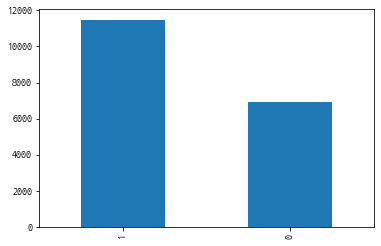

In [104]:
df['label_num'].value_counts().plot(kind = 'bar')

In [105]:
from nltk import FreqDist

In [226]:
# count = CountVectorizer()
# train_x_count = count.fit_transform(train_x)
# train_x_count.shape
# # count.vocabulary_

(14708, 29591)

In [158]:
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(train_x)
# train_x_encoded = tokenizer.texts_to_sequences(train_x)
# print(train_x_encoded[:5])

[[1, 2, 2185, 26, 25, 5, 102, 9, 21], [1, 2, 14, 3, 4863], [4864, 85, 3, 83], [1, 2, 1434, 1435, 1436, 13, 1437, 3, 4865], [1, 2, 4866]]


In [ ]:
# word_to_index = tokenizer.word_index
# print(word_to_index)

In [27]:
train_x_padded = pad_sequences(train_x_encoded, maxlen = 120)
train_x_padded.shape

(20261, 120)

In [234]:
train_x_padded.dtype

dtype('int32')

In [166]:
train_y.dtype

dtype('int64')

메일의 최대 길이 : 5
메일의 평균 길이 : 0.960120


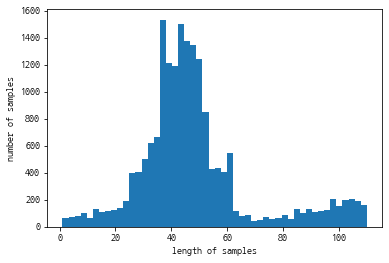

In [235]:
print('메일의 최대 길이 : %d' % max(len(sample) for sample in train_x_encoded))
print('메일의 평균 길이 : %f' % (sum(map(len, train_x_encoded))/len(train_x_encoded)))
plt.hist([len(sample) for sample in x], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [236]:
import tensorflow as tf
import tensorflow.keras as keras

In [237]:
from tensorflow.keras.callbacks import EarlyStopping

In [238]:
es = EarlyStopping(patience = 3, verbose = 1, restore_best_weights= True)

In [252]:
keras.backend.clear_session()
model = keras.Sequential()
model.add(keras.layers.Embedding(len(word_to_index) + 1, 32))
# model.add(keras.layers.Dropout(0.2))
# model.add(keras.layers.Conv1D(32, 5, strides=1, padding='valid', activation='swish'))
# model.add(keras.layers.MaxPool1D())
# model.add(keras.layers.Dense(64, activation='swish'))
# model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.SimpleRNN(32))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = keras.losses.binary_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])

# history = model.fit(train_x_padded, train_y, epochs = 4, batch_size = 64, validation_split = 0.2)

In [253]:
# # train_y = np.asarray(train_y)
# train_x_padded = train_x_padded.astype(np.float32)

In [256]:
history = model.fit(train_x_padded, train_y, epochs = 7 , batch_size = 64, validation_split = 0.2, callbacks = [es], verbose = 1)

ValueError: Data cardinality is ambiguous:
  x sizes: 16208
  y sizes: 14708
Make sure all arrays contain the same number of samples.

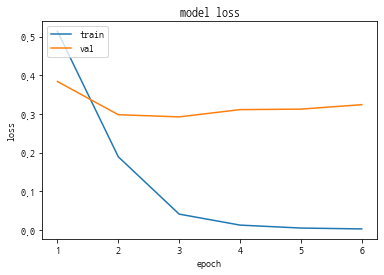

In [127]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [144]:
model.fit(train_x_padded, train_y, epochs = 1 , batch_size = 64, validation_split = 0.2, callbacks = [es], verbose = 1)

184/184 [==============================] - 16s 85ms/step - loss: 6.8109e-04 - accuracy: 1.0000 - val_loss: 0.3505 - val_accuracy: 0.8392


In [80]:
test = pd.read_csv('spam_test_text.csv',delimiter=',')

In [81]:
test.head()

,id,text
0,0,"[Web발신](광고)[강남시셔츠]대륙쵸이스문의""""홈phttp://bit.ly/shi..."
1,1,[Web발신](광고).님한.건.당..원무료거부
2,2,[Web발신]이태용님월일자전해드리는정보!밑져야본전!pf.kakao.com/_dkBxgj
3,3,[Web발신]달서구마지막억대분양성당태왕아너스평형무순위접수중청약통장無다주택자가능!
4,4,[Web발신](광고)개인업오늘하루만%연체나부결도OK카카오ID:HK무료거부


In [69]:
# test.drop('id', axis = 1,inplace = True)

In [77]:
# y = tf.convert_to_tensor(y)

In [82]:
test.head()

,id,text
0,0,"[Web발신](광고)[강남시셔츠]대륙쵸이스문의""""홈phttp://bit.ly/shi..."
1,1,[Web발신](광고).님한.건.당..원무료거부
2,2,[Web발신]이태용님월일자전해드리는정보!밑져야본전!pf.kakao.com/_dkBxgj
3,3,[Web발신]달서구마지막억대분양성당태왕아너스평형무순위접수중청약통장無다주택자가능!
4,4,[Web발신](광고)개인업오늘하루만%연체나부결도OK카카오ID:HK무료거부


In [83]:
count = CountVectorizer()
text_count = count.fit_transform(text)
text_count.shape

(9896, 19804)

In [84]:
tokenizer.fit_on_texts(text)
text_encoded = tokenizer.texts_to_sequences(text)
print(text_encoded[:5])

[[1, 2, 495, 288, 14, 9, 257], [1, 2, 77, 43, 40, 47], [1, 31, 8, 6, 5, 97], [1], [1, 2, 803, 804]]


In [85]:
word_to_index = tokenizer.word_index

In [ ]:
print(word_to_index)

In [87]:
text_padded = pad_sequences(text_encoded, maxlen = 120)
text_padded.shape

(9896, 120)

In [88]:
text = test['text']

In [89]:
pred = model.predict(text_padded)

In [90]:
test['label'] = pred

In [94]:
test.head()

,id,text,label
0,0,"[Web발신](광고)[강남시셔츠]대륙쵸이스문의""""홈phttp://bit.ly/shi...",0.0
1,1,[Web발신](광고).님한.건.당..원무료거부,0.0
2,2,[Web발신]이태용님월일자전해드리는정보!밑져야본전!pf.kakao.com/_dkBxgj,0.0
3,3,[Web발신]달서구마지막억대분양성당태왕아너스평형무순위접수중청약통장無다주택자가능!,0.0
4,4,[Web발신](광고)개인업오늘하루만%연체나부결도OK카카오ID:HK무료거부,1.0


In [92]:
test['label'] = test['label'].round()

In [93]:
pred = pred.round()

In [98]:
submission = pd.read_csv('spam_submission.csv')

In [99]:
submission['label'] = pred

In [102]:
submission

,id,label
0,0,ham
1,1,ham
2,2,ham
3,3,ham
4,4,spam
...,...,...
9891,9891,ham
9892,9892,ham
9893,9893,ham
9894,9894,ham


In [101]:
submission['label'].replace({1.0 : 'spam', 0.0 : 'ham'},inplace = True)

In [103]:
submission.to_csv('/aihub/data/submission_10.csv',index = False)

In [227]:
# train_x_encoded

메일 최대 길이 : 14
메일 평균 길이 : 3.399621683508388


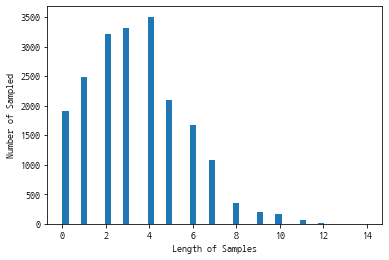

(20089, 60)
16071
4018
(16071, 60) (16071,) (4018, 60) (4018,)
Epoch 1/100
201/201 [==============================] - 12s 54ms/step - loss: 0.5486 - acc: 0.7100 - val_loss: 0.6288 - val_acc: 0.6339

Epoch 00001: val_acc improved from -inf to 0.63390, saving model to best_model.h5
Epoch 2/100
201/201 [==============================] - 10s 51ms/step - loss: 0.3494 - acc: 0.8259 - val_loss: 0.7061 - val_acc: 0.6358

Epoch 00002: val_acc improved from 0.63390 to 0.63577, saving model to best_model.h5
Epoch 3/100
201/201 [==============================] - 10s 51ms/step - loss: 0.3285 - acc: 0.8294 - val_loss: 0.6975 - val_acc: 0.6765

Epoch 00003: val_acc improved from 0.63577 to 0.67652, saving model to best_model.h5
Epoch 4/100
201/201 [==============================] - 11s 53ms/step - loss: 0.3160 - acc: 0.8345 - val_loss: 0.4336 - val_acc: 0.7966

Epoch 00004: val_acc improved from 0.67652 to 0.79658, saving model to best_model.h5
Epoch 5/100
201/201 [==============================] - 1

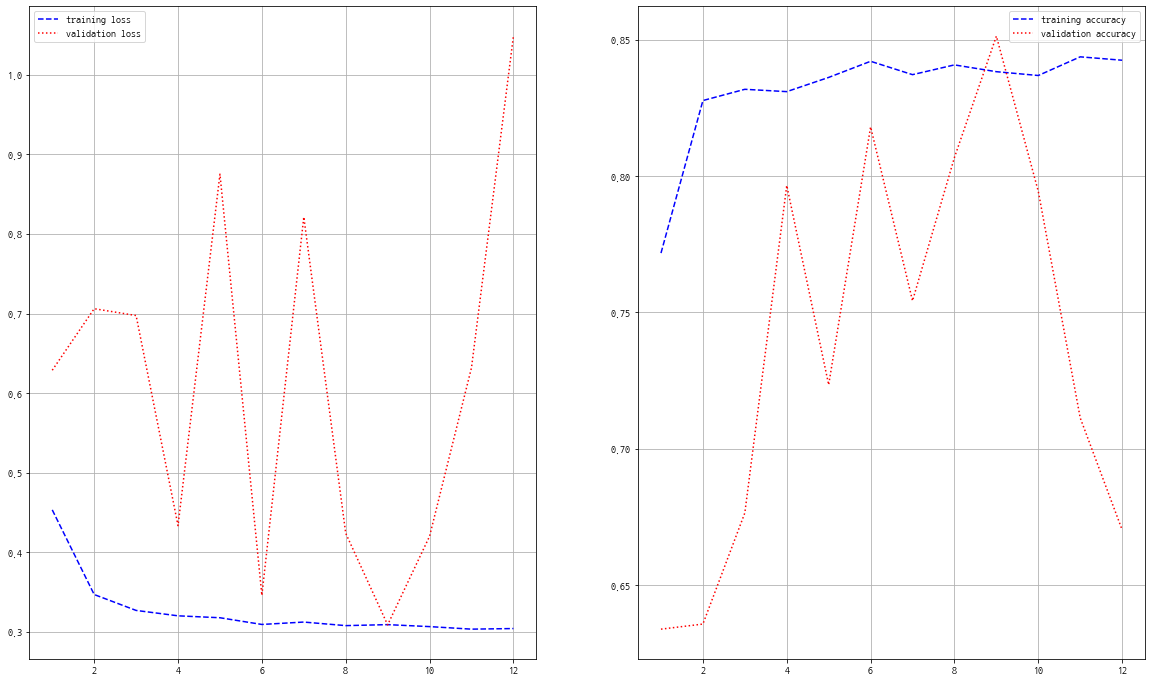

126/126 [==============================] - 1s 8ms/step - loss: 1.1224 - acc: 0.6453


[1.1223859786987305, 0.64534592628479]

In [79]:
data = pd.read_csv('spam.csv')
mecab = Mecab()

# In[162]:

data.dropna(inplace=True)
data.isna().sum()
data.reset_index(inplace=True)
data.drop(columns={'index'},inplace=True)

# In[163]:

dumm_cols = ['label']
x = pd.get_dummies(data, columns = dumm_cols, drop_first = True)

# In[164]:

target = 'label_spam'
y = x.loc[:, target]
x = x.drop(target, axis = 1)
# In[165]:
vocab_size = 1000
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(x['text']) # 토큰화
sequences = tokenizer.texts_to_sequences(x['text']) # 토큰에 인덱스 추가
X_data = sequences
print('메일 최대 길이 : {}'.format(max(len(l) for l in X_data)))
print('메일 평균 길이 : {}'.format(sum(map(len, X_data))/len(X_data)))
# 메일 최대 길이 : 172
# 메일 평균 길이 : 12.566840781582512
plt.hist([len(s) for s in X_data], bins = 50)
plt.xlabel('Length of Samples')
plt.ylabel('Number of Sampled')
plt.show()

# In[166]:

max_len = 60
data = pad_sequences(X_data, maxlen = max_len)
print(data.shape) # (5169, 60)
n_train = int(len(sequences)*0.8)
n_test = int(len(sequences) - n_train)

print(n_train) # 4135
print(n_test) # 1034
X_train = data[:n_train]
y_train = np.array(y[:n_train])
X_test = data[n_train:]
y_test = np.array(y[n_train:])
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape) # (4135, 60) (4135,) (1034, 60) (1034,)


# In[26]:


# 모델 구성
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding,Dropout, MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
keras.backend.clear_session()
model = Sequential()
model.add(Embedding(vocab_size, 32))
model.add(Dropout(0.2))
# model.add(Conv1D(32, 5, strides=1, padding='valid', activation='swish'))
# model.add(keras.layers.MaxPool1D())
# model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='swish'))
# model.add(Dropout(0.2))
model.add(keras.layers.SimpleRNN(32))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['acc'])
model.summary

# In[27]:
# earlystopping, checkpoints
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode = 'max', verbose=1, save_best_only=True)
# In[188]:
# 모델 학습
history = model.fit(X_train, y_train, epochs = 100, batch_size=64, validation_split=0.2, callbacks=[es, mc])
# In[189]:
# 시각화
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss)+1)

plt.figure(figsize = (20,12))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'b--', label = 'training loss')
plt.plot(epochs, val_loss, 'r:', label='validation loss')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'b--', label = 'training accuracy')
plt.plot(epochs, val_acc, 'r:', label='validation accuracy')
plt.grid()
plt.legend()

plt.show()


# In[190]:


model.evaluate(X_test, y_test)


# # RNN

In [63]:
asd = pd.read_csv('submission_a.csv')

In [69]:
asd.head()

,id,label
0,0,ham
1,1,ham
2,2,ham
3,3,ham
4,4,ham


In [66]:
asd['label'].replace({1.0 : 'spam', 0.0 : 'ham'},inplace = True)

In [68]:
asd.to_csv('/aihub/data/submission_a.csv',index = False)